# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

In [1]:
Name: Krishna 

NameError: name 'Krishna' is not defined

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [5]:
import pandas as pd

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [9]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column are missing, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [15]:
threshold = 0.5 * len(data)  # 50% threshold
data_cleaned = data.dropna(thresh=threshold, axis=1)

In [17]:
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns  # Identifying categorical columns
data_cleaned = data_cleaned.dropna(subset=categorical_cols)

In [19]:
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns  # Identifying numerical columns
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].mean())


In [21]:
print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  CreditCardUtilizationRate   19900 no

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [30]:
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns


In [32]:
for col in categorical_cols:
    if data_cleaned[col].nunique() == len(data_cleaned):
        data_cleaned = data_cleaned.drop(col, axis=1)


In [34]:
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)


In [36]:
print(data_cleaned.info())
print(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   Experience                      19900 non-null  int64  
 4   LoanAmount                      19900 non-null  int64  
 5   LoanDuration                    19900 non-null  int64  
 6   NumberOfDependents              19900 non-null  int64  
 7   MonthlyDebtPayments             19900 non-null  int64  
 8   CreditCardUtilizationRate       19900 non-null  float64
 9   NumberOfOpenCreditLines         19900 non-null  int64  
 10  NumberOfCreditInquiries         19900 non-null  int64  
 11  DebtToIncomeRatio               19900 non-null  float64
 12  BankruptcyHistory               19900

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [38]:
X = data_cleaned.drop('LoanApproved', axis=1)  # Features (all columns except LoanApproved)
y = data_cleaned['LoanApproved']               # Label (the prediction target)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47648635)

In [50]:
print(f"Training Features Shape: {X_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (15920, 44)
Training Labels Shape: (15920,)
Testing Features Shape: (3980, 44)
Testing Labels Shape: (3980,)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [88]:
# Import LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression
# Import accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score, f1_score

In [90]:
X = data_cleaned.drop('LoanApproved', axis=1)  # Features
y = data_cleaned['LoanApproved']               # Label

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47648635)

In [94]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler


In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on testing data


In [98]:
logistic_model = LogisticRegression(max_iter=2000, random_state=47648635)
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000, random_state=47648635)

In [100]:
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

In [104]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Training F1-Score: {train_f1}")

Training Accuracy: 0.9660175879396985
Training F1-Score: 0.9279723072826521


In [106]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Testing Accuracy: {test_accuracy}")
print(f"Testing F1-Score: {test_f1}")

Testing Accuracy: 0.9660804020100503
Testing F1-Score: 0.9289847448711205


In [110]:
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.05:
    print("The model is likely overfitting.")
else:
    print("The model does not appear to be overfitting.")

The model does not appear to be overfitting.


### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import RFE


In [115]:
X = data_cleaned.drop('LoanApproved', axis=1)  # Features
y = data_cleaned['LoanApproved']               # Label


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47648635)


In [119]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on testing data


In [121]:
logistic_model = LogisticRegression(max_iter=2000, random_state=47648635)
logistic_model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=2000, random_state=47648635)

In [127]:
n_features_to_select = range(1, X.shape[1] + 1)  # Evaluate all features
accuracy_list = []
f1_list = []

# Note: Instead of fitting RFE on scaled data inside the loop, 
# we'll fit it on the original data.
for n in n_features_to_select:
    rfe = RFE(estimator=logistic_model, n_features_to_select=n)
    rfe.fit(X_train_scaled, y_train)
    
    # Predictions
    y_test_pred = rfe.predict(X_test_scaled)
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Store performance metrics
    accuracy_list.append(test_accuracy)
    f1_list.append(test_f1)

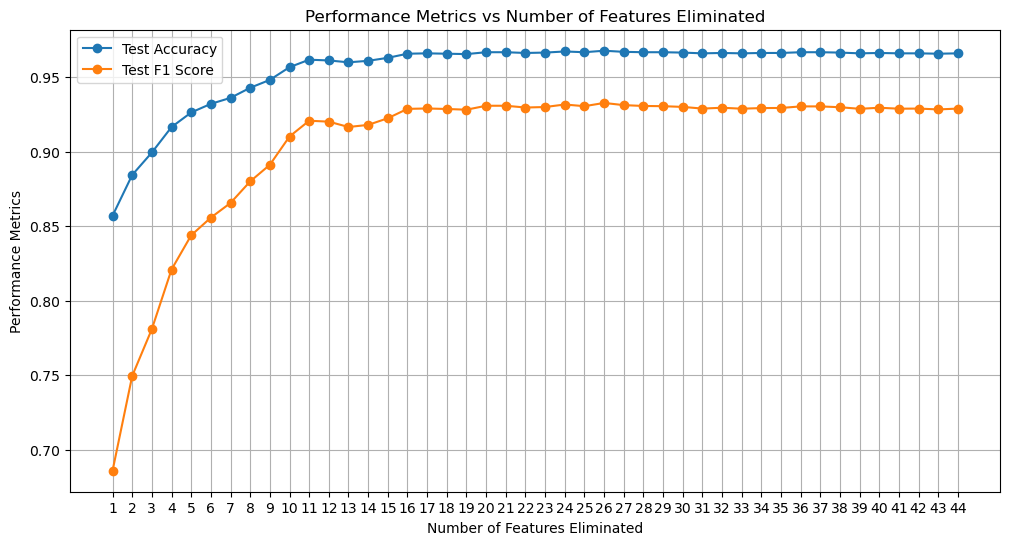

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(n_features_to_select, accuracy_list, label='Test Accuracy', marker='o')
plt.plot(n_features_to_select, f1_list, label='Test F1 Score', marker='o')
plt.title('Performance Metrics vs Number of Features Eliminated')
plt.xlabel('Number of Features Eliminated')
plt.ylabel('Performance Metrics')
plt.xticks(n_features_to_select)
plt.legend()
plt.grid()
plt.show()


In [129]:
optimal_n_features = 10  # Choose based on visualization results

In [130]:
final_rfe = RFE(estimator=logistic_model, n_features_to_select=optimal_n_features)
final_rfe.fit(X_train_scaled, y_train)


RFE(estimator=LogisticRegression(max_iter=2000, random_state=47648635),
    n_features_to_select=10)

In [131]:
final_selected_features = X.columns[final_rfe.support_]
print("Final Selected Features:")
print(final_selected_features)

Final Selected Features:
Index(['CreditScore', 'LoanAmount', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'MonthlyIncome',
       'NetWorth', 'InterestRate', 'TotalDebtToIncomeRatio',
       'EducationLevel_High School'],
      dtype='object')


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)   

In [145]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)  # 1-NN
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=1)

In [147]:
y_train_pred = knn_classifier.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)


In [149]:
y_test_pred = knn_classifier.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [151]:
print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1)


Training Accuracy: 1.0
Training F1 Score: 1.0
Testing Accuracy: 0.8125628140703518
Testing F1 Score: 0.5927947598253275


In [155]:
if train_accuracy > test_accuracy:
    print("The model may be overfitting as the training accuracy is higher than the testing accuracy.")
elif train_accuracy == test_accuracy:
    print("The model is performing equally on training and testing data, indicating no overfitting.")
else:
    print("The model is not overfitting as the training accuracy is lower than or equal to the testing accuracy.")

The model may be overfitting as the training accuracy is higher than the testing accuracy.


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [164]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 31)}  # K values from 1 to 30

In [166]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)  # 5-fold cross-validation


In [169]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [170]:
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_


In [171]:
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


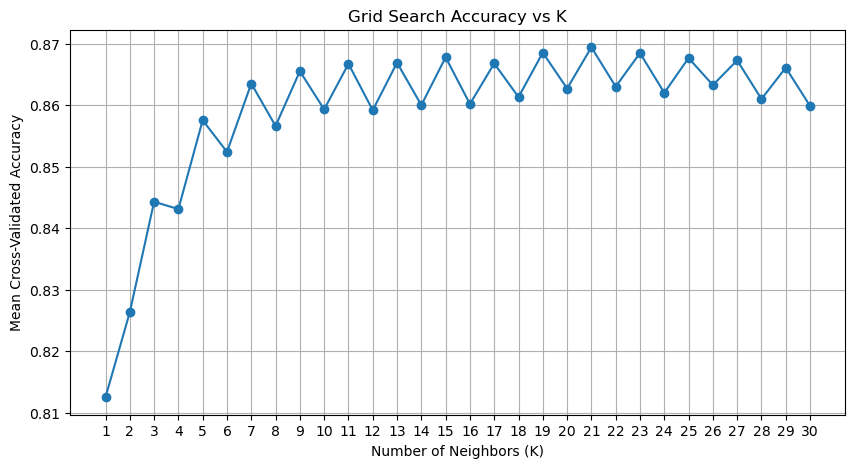

In [175]:
plt.figure(figsize=(10, 5))
plt.plot(grid_search.cv_results_['param_n_neighbors'], grid_search.cv_results_['mean_test_score'], marker='o')
plt.title('Grid Search Accuracy vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(np.arange(1, 31, step=1))
plt.grid()
plt.show()

In [177]:
print("Best K:", best_k)
print("Best Cross-Validated Accuracy:", best_accuracy)
print("Test Accuracy for Best K:", test_accuracy)
print("Test F1 Score for Best K:", test_f1)

Best K: 21
Best Cross-Validated Accuracy: 0.8694095477386934
Test Accuracy for Best K: 0.8711055276381909
Test F1 Score for Best K: 0.6577718478985991


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

In [180]:
distance_metrics = ['euclidean', 'manhattan', 'cosine']
accuracy_results = []
f1_results = []

In [182]:
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)  # Use best K from previous steps
    knn.fit(X_train_scaled, y_train)
    
    # Predictions
    y_test_pred = knn.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Store results
    accuracy_results.append(accuracy)
    f1_results.append(f1)

In [184]:
results_df = pd.DataFrame({
    'Distance Metric': distance_metrics,
    'Accuracy': accuracy_results,
    'F1 Score': f1_results
})


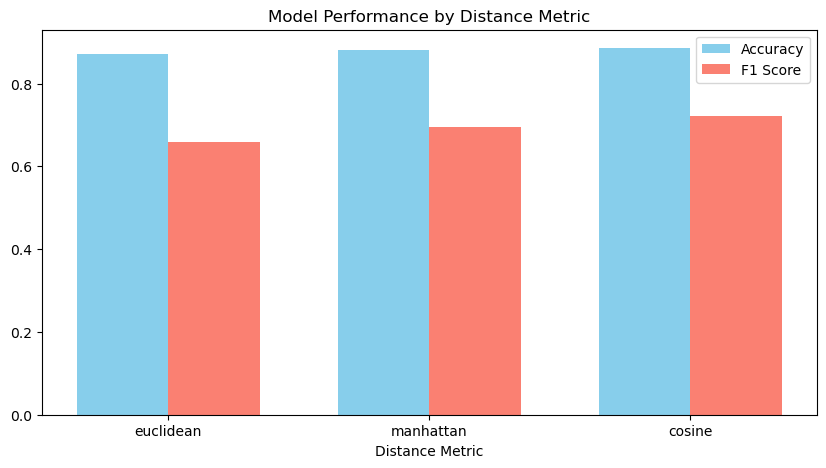

In [186]:
x = np.arange(len(distance_metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, results_df['Accuracy'], width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, results_df['F1 Score'], width, label='F1 Score', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Distance Metric')
ax.set_title('Model Performance by Distance Metric')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Distance Metric'])
ax.legend()

In [188]:
def add_value_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_annotations(bars1)
add_value_annotations(bars2)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [190]:
best_accuracy = results_df['Accuracy'].max()
best_f1 = results_df['F1 Score'].max()
worst_accuracy = results_df['Accuracy'].min()
worst_f1 = results_df['F1 Score'].min()

print("Best Accuracy Metric:", results_df.loc[results_df['Accuracy'].idxmax()])
print("Worst Accuracy Metric:", results_df.loc[results_df['Accuracy'].idxmin()])
print("Best F1 Score Metric:", results_df.loc[results_df['F1 Score'].idxmax()])
print("Worst F1 Score Metric:", results_df.loc[results_df['F1 Score'].idxmin()])

Best Accuracy Metric: Distance Metric      cosine
Accuracy           0.885678
F1 Score           0.722392
Name: 2, dtype: object
Worst Accuracy Metric: Distance Metric    euclidean
Accuracy            0.871106
F1 Score            0.657772
Name: 0, dtype: object
Best F1 Score Metric: Distance Metric      cosine
Accuracy           0.885678
F1 Score           0.722392
Name: 2, dtype: object
Worst F1 Score Metric: Distance Metric    euclidean
Accuracy            0.871106
F1 Score            0.657772
Name: 0, dtype: object


portfolio 3 done